In [1]:
import pandas as pd
from pandas import DataFrame as df
import nltk

In [152]:
#to see full text
pd.set_option('display.max_colwidth', -1)

In [157]:
file = pd.read_csv('FIFA.csv')
file

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,"RT @FCBarcelona: ?? @ivanrakitic scores the winning penalty to send @HNS_CFF into the #WorldCup quarter-finals, where they'll face Russia!…",scores the winning penalty to send into the quarter finals where they will face Russia,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game.... @EvgeniPlushenko ?????? #worldcup https://t.co/LKifuNlubC,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,NaN,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe got that power power~\r\n\r\n#PowerByEXO #WorldCup #FIFAStadiumDJ #XiuminLeague \r\n@weareoneEXO @FIFAWorldCup,We get stronger Turn the music up now We got that power power,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,NaN,137,216
5,1013597039995867143,en,2018-07-02 01:35:40,Twitter for Android,140,"RT @FIFAWorldCup: ""We’re looking strong going into the knockout stage"" ?\r\nWe caught up with @CBF_Futebol's @Casemiro ahead of #BRAMEX\r\n#World…",We re looking strong going into the knockout stage We caught up with ahead of,0,153,BRAMEX,"FIFA World Cup ?,CBF Futebol,Casemiro","FIFAWorldCup,CBF_Futebol,Casemiro",Ligefut,NaN,29,283
6,1013597039978995712,en,2018-07-02 01:35:40,Twitter for iPhone,140,"RT @ShShShShShSh555: I'm happy for #Russia winning. Especially since, you know, we colluded and all. \r\nRussia eliminates Spain after penalty…",am happy for winning Especially since you know we colluded and all Russia eliminates Spain after penalty,0,4,Russia,V?Deplorable?45 ??,ShShShShShSh555,?a?????,Mount Olympus,208,338
7,1013597038951436288,en,2018-07-02 01:35:40,Twitter Web Client,138,RT @FridaCarrillo05: When you see me\r\nWhen we feel the same feeling\r\nPower power~\r\n\r\n?????\r\n#PowerByEXO #WorldCup #FIFAStadiumDJ #XiuminLeague…,When you see me When we feel the same feeling Power power,0,1,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague",Frida Carrillo,FridaCarrillo05,"STAN LEGENDS, STAN EXO","Lima, Peru",7,9
8,1013597038188154880,en,2018-07-02 01:35:40,Twitter for Android,138,RT @FIFAWorldCup: Kasper Schmeichel takes the final @Budweiser #ManoftheMatch award of the day ?\r\n#CRODEN #WorldCup https://t.co/2XfblBT7ki,Kasper Schmeichel takes the final award of the day,0,2199,"ManoftheMatch,CRODEN,WorldCup","FIFA World Cup ?,Budweiser","FIFAWorldCup,Budweiser",Sky Ler,NaN,1,6
9,1013597037118525440,en,2018-07-02 01:35:40,Twitter Lite,139,RT @BTSARMYNA: .@BTS_twt After 5 Years\r\n1. Global Puma Ambassador\r\n2. LG Mobile Ambassador\r\n3. CocaCola WorldCup\r\n4. Kookmin Bank\r\n5. UNICEF\r\n6.…,After Years Global Puma Ambassador LG Mobile Ambassador CocaCola WorldCup Kookmin Bank UNICEF,0,5146,NaN,"???? & ???? ???? ™ ??,?????","BTSARMYNA,BTS_twt",Kate,Meme City,158,245


In [14]:
#function designed to check emojis
s = "German football team disappears from the Worldcup without much honor and Merkel's government is falling. Wir schaffen dassssss :-) #MerkelRaus"
import re
def e(s):
    x = re.findall(r'[^\w\s,#@?`.]', s)
    return ''.join(x)
e(s)
# extract_emojis(s)

"':-)"

In [111]:
# file['Orig_Tweet'].apply(e)[:250]

In [28]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
# import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [154]:
#sentiment analysis of tweet fifa
#analysising sentiment and saving to new column
# import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in file['Orig_Tweet']:
    tokenizer = RegexpTokenizer(r'\w+')
    line2 = ' '.join(tokenizer.tokenize(line))
    pol_score = sia.polarity_scores(line2)
    pol_score['Orig_Tweet'] = line2
    results.append(pol_score)

pprint(results[:5], width=100)

In [ ]:
d = pd.DataFrame.from_records(results)
d.head()

In [ ]:
#file containing sentimen of each tweets after doing natural language processing
d.to_csv('fifasentim.csv', mode='a', encoding='utf-8', index=False)

In [62]:
import pandas as pd
from pandas import DataFrame as df


In [158]:
#fifasentimfile is formend by combining fifasentim and FIFA 
file = pd.read_csv('fifasentimfile.csv')
# file = file.drop(['emoji'], axis = 1)
file

,Orig_Tweet,compound,neg,neu,pos
0,RT Squawka Only two goalkeepers have saved three penalties in a WorldCup penalty shoot out 1 7 2006 POR s Ricardo vs ENG 1 7 20,-0.3818,0.214,0.675,0.111
1,RT FCBarcelona ivanrakitic scores the winning penalty to send HNS_CFF into the WorldCup quarter finals where they ll face Russia,0.1027,0.123,0.738,0.139
2,RT javierfernandez Tonight we have big game EvgeniPlushenko worldcup https t co LKifuNlubC,0.0000,0.000,1.000,0.000
3,We get stronger Turn the music up now We got that power power PowerByEXO WorldCup FIFAStadiumDJ XiuminLeague weareoneEXO FIFAWorldCup,0.3818,0.000,0.874,0.126
4,RT Squawka Only two goalkeepers have saved three penalties in a WorldCup penalty shoot out 1 7 2006 POR s Ricardo vs ENG 1 7 20,-0.3818,0.214,0.675,0.111
5,RT FIFAWorldCup We re looking strong going into the knockout stage We caught up with CBF_Futebol s Casemiro ahead of BRAMEX World,0.5106,0.000,0.858,0.142
6,RT ShShShShShSh555 I m happy for Russia winning Especially since you know we colluded and all Russia eliminates Spain after penalty,0.6249,0.115,0.613,0.272
7,RT FridaCarrillo05 When you see me When we feel the same feeling Power power PowerByEXO WorldCup FIFAStadiumDJ XiuminLeague,0.1280,0.000,0.919,0.081
8,RT FIFAWorldCup Kasper Schmeichel takes the final Budweiser ManoftheMatch award of the day CRODEN WorldCup https t co 2XfblBT7ki,0.5423,0.000,0.829,0.171
9,RT BTSARMYNA BTS_twt After 5 Years 1 Global Puma Ambassador 2 LG Mobile Ambassador 3 CocaCola WorldCup 4 Kookmin Bank 5 UNICEF 6,0.0000,0.000,1.000,0.000


In [5]:
import pandas as pd
from pandas import DataFrame as df
file2 = pd.read_csv('3061113_1081763342_emojiranking.csv')
emfile = file2[['Char','Sentiment score']][1:]
emfile


,Char,Sentiment score
1,😂,0.221
2,❤,0.746
3,♥,0.657
4,😍,0.678
5,😭,-0.093
6,😘,0.701
7,😊,0.644
8,👌,0.563
9,💕,0.632
10,👏,0.52


In [76]:
#converting all the string value in column using .astype(float) into float 
emfile['Sentiment score'] = emfile['Sentiment score'].astype(float)
posemoji1 = emfile[emfile['Sentiment score'] >= 0.5][:12]
posemoji2 = emfile[(emfile['Sentiment score'] > 0) & (emfile['Sentiment score'] < 0.5)][:12]
negemoji1 = emfile[emfile['Sentiment score'] <= -0.5][:12]
negemoji2 = emfile[(emfile['Sentiment score'] > -0.5) & (emfile['Sentiment score'] <= 0)][:12]

#print datafras as itis
# display(posemoji1)
display(negemoji2)

,Char,Sentiment score
5,😭,-0.093
15,😩,-0.368
24,😒,-0.374
28,😔,-0.146
40,█,-0.032
42,😡,-0.173
48,😴,-0.080
54,🔫,-0.194
59,😞,-0.118
62,😪,-0.080


In [73]:
#converting into list for easy processing
posemoji1 = posemoji1['Char'].tolist()
negemoji1 = negemoji1['Char'].tolist()
posemoji2 = posemoji2['Char'].tolist()
negemoji2 = negemoji2['Char'].tolist()
negemoji2

['😭', '😩', '😒', '😔', '█', '😡', '😴', '🔫', '😞', '😪', '😫', '💀']

In [74]:
import random
def add_emj(x):
# #     count = 0
        if x >= 0.5:
            return random.choice(posemoji1)
        elif (x > 0) and (x < 0.5):
            return random.choice(posemoji2)
        elif x <= - 0.5:
            return random.choice(negemoji1)
        else:
            return random.choice(negemoji2)
            
file['emoji'] = file['compound'].apply(add_emj)
            


In [75]:
file

,Orig_Tweet,compound,neg,neu,pos,emoji
0,RT Squawka Only two goalkeepers have saved three penalties in a WorldCup penalty shoot out 1 7 2006 POR s Ricardo vs ENG 1 7 20,-0.3818,0.214,0.675,0.111,🔫
1,RT FCBarcelona ivanrakitic scores the winning penalty to send HNS_CFF into the WorldCup quarter finals where they ll face Russia,0.1027,0.123,0.738,0.139,😄
2,RT javierfernandez Tonight we have big game EvgeniPlushenko worldcup https t co LKifuNlubC,0.0000,0.000,1.000,0.000,█
3,We get stronger Turn the music up now We got that power power PowerByEXO WorldCup FIFAStadiumDJ XiuminLeague weareoneEXO FIFAWorldCup,0.3818,0.000,0.874,0.126,😉
4,RT Squawka Only two goalkeepers have saved three penalties in a WorldCup penalty shoot out 1 7 2006 POR s Ricardo vs ENG 1 7 20,-0.3818,0.214,0.675,0.111,🔫
5,RT FIFAWorldCup We re looking strong going into the knockout stage We caught up with CBF_Futebol s Casemiro ahead of BRAMEX World,0.5106,0.000,0.858,0.142,👌
6,RT ShShShShShSh555 I m happy for Russia winning Especially since you know we colluded and all Russia eliminates Spain after penalty,0.6249,0.115,0.613,0.272,🙌
7,RT FridaCarrillo05 When you see me When we feel the same feeling Power power PowerByEXO WorldCup FIFAStadiumDJ XiuminLeague,0.1280,0.000,0.919,0.081,😂
8,RT FIFAWorldCup Kasper Schmeichel takes the final Budweiser ManoftheMatch award of the day CRODEN WorldCup https t co 2XfblBT7ki,0.5423,0.000,0.829,0.171,❤
9,RT BTSARMYNA BTS_twt After 5 Years 1 Global Puma Ambassador 2 LG Mobile Ambassador 3 CocaCola WorldCup 4 Kookmin Bank 5 UNICEF 6,0.0000,0.000,1.000,0.000,😫


In [77]:
file.to_csv('fifasentimfile1.csv', mode='a', encoding='utf-8', index=False)a

***********************************************sentiment of words with emoji***********************************************

In [137]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# file2 = file[:3]
#x= tweet, y = ss score
def tweet_compound(x, y):
    test_subset = x.split(' ')
#     test_subset.remove('RT')
#     print(test_subset)
    #sentiment score for each words
    ss = []
    for word in test_subset:
#         print('1st',word)
        ss.append((word, sid.polarity_scores(word)['compound']))
#         print(ss)
    if y <= 0:
        return min(ss,key=lambda item:item[1])[0]
    elif y > 0:
        return max(ss,key=lambda item:item[1])[0]
    
file['words'] = file.apply(lambda row : tweet_compound(row['Orig_Tweet'], 
                     row['compound']), axis = 1)
                           

In [139]:
file

,Orig_Tweet,compound,neg,neu,pos,emoji,words
0,RT Squawka Only two goalkeepers have saved three penalties in a WorldCup penalty shoot out 1 7 2006 POR s Ricardo vs ENG 1 7 20,-0.3818,0.214,0.675,0.111,🔫,penalty
1,RT FCBarcelona ivanrakitic scores the winning penalty to send HNS_CFF into the WorldCup quarter finals where they ll face Russia,0.1027,0.123,0.738,0.139,😄,winning
2,RT javierfernandez Tonight we have big game EvgeniPlushenko worldcup https t co LKifuNlubC,0.0000,0.000,1.000,0.000,█,RT
3,We get stronger Turn the music up now We got that power power PowerByEXO WorldCup FIFAStadiumDJ XiuminLeague weareoneEXO FIFAWorldCup,0.3818,0.000,0.874,0.126,😉,stronger
4,RT Squawka Only two goalkeepers have saved three penalties in a WorldCup penalty shoot out 1 7 2006 POR s Ricardo vs ENG 1 7 20,-0.3818,0.214,0.675,0.111,🔫,penalty
5,RT FIFAWorldCup We re looking strong going into the knockout stage We caught up with CBF_Futebol s Casemiro ahead of BRAMEX World,0.5106,0.000,0.858,0.142,👌,strong
6,RT ShShShShShSh555 I m happy for Russia winning Especially since you know we colluded and all Russia eliminates Spain after penalty,0.6249,0.115,0.613,0.272,🙌,happy
7,RT FridaCarrillo05 When you see me When we feel the same feeling Power power PowerByEXO WorldCup FIFAStadiumDJ XiuminLeague,0.1280,0.000,0.919,0.081,😂,feeling
8,RT FIFAWorldCup Kasper Schmeichel takes the final Budweiser ManoftheMatch award of the day CRODEN WorldCup https t co 2XfblBT7ki,0.5423,0.000,0.829,0.171,❤,award
9,RT BTSARMYNA BTS_twt After 5 Years 1 Global Puma Ambassador 2 LG Mobile Ambassador 3 CocaCola WorldCup 4 Kookmin Bank 5 UNICEF 6,0.0000,0.000,1.000,0.000,😫,RT


In [144]:
#doing natural language processing on the word column of the file dataset
from textblob import TextBlob
# from nltk.stem import PorterStemmer
# st = PorterStemmer()
#lemitiztation is prefered over steaming
from textblob import Word
def text_processing(w):
    
    #converting into lowarcase 
    w = w.lower()
    #correcting spelling mistakes
    w = TextBlob(w).correct()
    #converting it to its root word
    w = Word(w).lemmatize()
    return w

In [147]:
file['words'] = file['words'].apply(text_processing)


In [151]:
set(file['words'].tolist())

{TextBlob("episode"),
 TextBlob("stay"),
 TextBlob("jailed"),
 TextBlob("goodness"),
 TextBlob("joy"),
 TextBlob("itsammusic"),
 TextBlob("ivanrakitic"),
 TextBlob("dominance"),
 TextBlob("gooooood"),
 TextBlob("apology"),
 TextBlob("almansalwi"),
 TextBlob("praised"),
 TextBlob("blow"),
 TextBlob("token"),
 TextBlob("wondering"),
 TextBlob("distraught"),
 TextBlob("apparently"),
 TextBlob("kristianjack"),
 TextBlob("aa9skillz"),
 TextBlob("dubrovnik"),
 TextBlob("bulletin"),
 TextBlob("total"),
 TextBlob("kschmeichel1"),
 TextBlob("gold"),
 TextBlob("navy"),
 TextBlob("8fact_footballl"),
 TextBlob("gergilroy"),
 TextBlob("choosing"),
 TextBlob("print"),
 TextBlob("english"),
 TextBlob("cent"),
 TextBlob("little"),
 TextBlob("humorously"),
 TextBlob("andy"),
 TextBlob("very"),
 TextBlob("83"),
 TextBlob("najeebbnajeeb"),
 TextBlob("memory"),
 TextBlob("rule"),
 TextBlob("michel"),
 TextBlob("spite"),
 TextBlob("in"),
 TextBlob("utah"),
 TextBlob("from"),
 TextBlob("duuuude"),
 TextBlob

In [148]:
#saving it to its 
file.to_csv('fifasentimfile2.csv', mode='a', encoding='utf-8', index=False)

In [169]:
#deleting row with zero sentiment score
file2 = pd.read_csv('fifasentimfile2.csv')
file2 = file2.drop(file2[file2['compound'] == 0.0].index)

In [170]:
file2

,Orig_Tweet,compound,neg,neu,pos,emoji,words
0,RT Squawka Only two goalkeepers have saved three penalties in a WorldCup penalty shoot out 1 7 2006 POR s Ricardo vs ENG 1 7 20,-0.3818,0.214,0.675,0.111,🔫,penalty
1,RT FCBarcelona ivanrakitic scores the winning penalty to send HNS_CFF into the WorldCup quarter finals where they ll face Russia,0.1027,0.123,0.738,0.139,😄,winning
3,We get stronger Turn the music up now We got that power power PowerByEXO WorldCup FIFAStadiumDJ XiuminLeague weareoneEXO FIFAWorldCup,0.3818,0.000,0.874,0.126,😉,stronger
4,RT Squawka Only two goalkeepers have saved three penalties in a WorldCup penalty shoot out 1 7 2006 POR s Ricardo vs ENG 1 7 20,-0.3818,0.214,0.675,0.111,🔫,penalty
5,RT FIFAWorldCup We re looking strong going into the knockout stage We caught up with CBF_Futebol s Casemiro ahead of BRAMEX World,0.5106,0.000,0.858,0.142,👌,strong
6,RT ShShShShShSh555 I m happy for Russia winning Especially since you know we colluded and all Russia eliminates Spain after penalty,0.6249,0.115,0.613,0.272,🙌,happy
7,RT FridaCarrillo05 When you see me When we feel the same feeling Power power PowerByEXO WorldCup FIFAStadiumDJ XiuminLeague,0.1280,0.000,0.919,0.081,😂,feeling
8,RT FIFAWorldCup Kasper Schmeichel takes the final Budweiser ManoftheMatch award of the day CRODEN WorldCup https t co 2XfblBT7ki,0.5423,0.000,0.829,0.171,❤,award
11,RT SiClancy I know it s been an amazing World Cup but this is a bit too much excitement from Nacho worldcup https t co PUCzb7nLP1,0.7717,0.000,0.749,0.251,❤,amazing
12,RT valpan026 eunicehuili RachelWeng3 FIFAWorldCup weareoneEXO POWER by our happy virus EXO will be a perfect choice Happy always,0.9022,0.000,0.575,0.425,♥,happy


In [173]:
file2.to_csv('fifasentimfile3.csv', mode='a', encoding='utf-8', index=False)

In [172]:
len(set(file2['words'].tolist()))

2263

<Figure size 40000x8000 with 0 Axes>

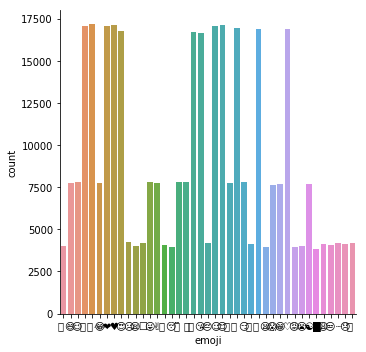

In [184]:
#emoji lot
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(80, 16), dpi= 500, facecolor='w', edgecolor='k')
sns.catplot('emoji', kind='count', data=file2)